# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [79]:
import pandas_datareader.data as web

import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.

In [80]:
f = web.DataReader('^DJI', 'stooq')    

In [81]:
f.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-17,23817.15,24264.21,23817.15,24242.49,NaN
2020-04-16,23543.66,23598.08,23211.38,23537.68,119010170.0
2020-04-15,23600.72,23649.72,23233.32,23504.35,109265669.0
2020-04-14,23690.57,24040.58,23683.44,23949.76,125209325.0
2020-04-13,23698.93,23698.93,23095.35,23390.77,103132107.0


In [83]:
# Bank of America
BAC = web.DataReader("BAC", 'stooq')

# CitiGroup
C = web.DataReader("C", 'stooq')

# Goldman Sachs
GS = web.DataReader("GS", 'stooq')

# JPMorgan Chase
JPM = web.DataReader("JPM", 'stooq')

# Morgan Stanley
MS = web.DataReader("MS", 'stooq')

# Wells Fargo
WFC = web.DataReader("WFC", 'stooq')

In [107]:
BAC.head()



,Open,High,Low,Close,Volume
Date,,,,,
2020-04-17,183.49,185.28,178.290,183.49,5426703
2020-04-16,177.22,178.44,172.390,177.04,4662186
2020-04-15,170.63,181.68,169.150,178.52,6042720
2020-04-14,182.35,183.38,174.543,178.23,4149605
2020-04-13,183.85,184.97,179.130,179.18,4774325


In [108]:
GS.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-17,183.49,185.28,178.290,183.49,5426703
2020-04-16,177.22,178.44,172.390,177.04,4662186
2020-04-15,170.63,181.68,169.150,178.52,6042720
2020-04-14,182.35,183.38,174.543,178.23,4149605
2020-04-13,183.85,184.97,179.130,179.18,4774325


In [109]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq')

In [110]:
df.sort_index(inplace=True)
df.head()

Attributes   Close                                            High          \
Symbols        BAC       C      GS     JPM      MS     WFC     BAC       C   
Date                                                                         
2015-04-21  14.205  48.302  182.06  54.416  32.818  46.325  14.332  49.206   
2015-04-22  14.425  48.875  183.43  54.965  33.219  46.659  14.506  49.131   
2015-04-23  14.378  48.987  184.33  54.844  33.380  46.820  14.478  49.149   
2015-04-24  14.332  48.690  183.10  54.670  33.362  46.684  14.435  48.987   
2015-04-27  14.259  48.599  181.78  54.443  33.088  46.913  14.443  49.140   

Attributes                  ...    Open                            Volume  \
Symbols         GS     JPM  ...      GS     JPM      MS     WFC       BAC   
Date                        ...                                             
2015-04-21  184.52  55.543  ...  184.02  55.307  33.005  46.556  69856417   
2015-04-22  184.19  55.150  ...  183.03  54.712  32.911  46.350  79755243   
2015-04-23  185.42  55.203  ...  183.08  54.924  33.192  46.436  54880093   
2015-04-24  184.14  54.880  ...  184.14  54.694  33.330  46.734  44485079   
2015-04-27  184.33  55.150  ...  184.05  54.757  33.436  46.761  80230598   

Attributes                                                   
Symbols            C       GS       JPM        MS       WFC  
Date                                                         
2015-04-21  21244363  2020030  17158892  12743746  12835245  
2015-04-22  16158853  2095552  16585835  11378272  15892169  
2015-04-23  14177573  2220193  14715424   9503194  17174822  
2015-04-24  11028006  1563098  10989763   9678375  17890018  
2015-04-27  16962674  1910533  12763321   9383223  23261593  

[5 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [111]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [112]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [113]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [162]:
bank_stocks.head()

Bank Ticker    BAC                                     C                 \
Stock Info    Open   High    Low  Close    Volume   Open   High     Low   
Date                                                                      
2020-04-17   22.34  23.40  22.31  23.28  92800270  43.15  45.62  42.650   
2020-04-16   22.15  22.21  21.09  21.42  89213331  42.71  42.84  40.100   
2020-04-15   22.16  22.65  21.91  22.19  99082222  43.37  44.27  42.610   
2020-04-14   24.50  24.65  23.10  23.73  88991066  47.66  47.74  43.525   
2020-04-13   24.78  24.85  23.78  23.92  83164717  47.50  47.57  45.270   

Bank Ticker                   ...     MS                                 \
Stock Info   Close    Volume  ...   Open   High    Low  Close    Volume   
Date                          ...                                         
2020-04-17   45.45  41252949  ...  39.55  40.10  38.19  39.09  25074468   
2020-04-16   40.52  37756002  ...  37.86  38.82  37.07  38.36  27913002   
2020-04-15   42.86  32248988  ...  38.21  39.41  37.59  38.40  15590055   
2020-04-14   45.42  40466175  ...  40.51  40.77  38.37  39.86  14471851   
2020-04-13   46.68  27944323  ...  40.88  41.00  39.25  39.58  13369867   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2020-04-17   28.15  28.78  27.80  28.38  46984953  
2020-04-16   28.28  28.28  26.66  26.89  52962096  
2020-04-15   28.77  29.11  28.22  28.44  41883866  
2020-04-14   32.11  32.50  29.56  30.18  64267050  
2020-04-13   33.22  33.24  31.41  31.43  36068902  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [263]:
bank_stocks

Bank Ticker     BAC                                         C                  \
Stock Info     Open    High     Low   Close    Volume    Open    High     Low   
Date                                                                            
2015-04-21   14.294  14.332  14.141  14.205  69856417  49.005  49.206  48.091   
2015-04-22   14.250  14.506  14.195  14.425  79755243  48.339  49.131  48.186   
2015-04-23   14.407  14.478  14.370  14.378  54880093  48.791  49.149  48.617   
2015-04-24   14.397  14.435  14.303  14.332  44485079  48.930  48.987  48.643   
2015-04-27   14.322  14.443  14.259  14.259  80230598  48.729  49.140  48.581   
...             ...     ...     ...     ...       ...     ...     ...     ...   
2020-04-13   24.780  24.850  23.780  23.920  83164717  47.500  47.570  45.270   
2020-04-14   24.500  24.650  23.100  23.730  88991066  47.660  47.740  43.525   
2020-04-15   22.160  22.650  21.910  22.190  99082222  43.370  44.270  42.610   
2020-04-16   22.150  22.210  21.090  21.420  89213331  42.710  42.840  40.100   
2020-04-17   22.340  23.400  22.310  23.280  92800270  43.150  45.620  42.650   

Bank Ticker                    ...      MS                                    \
Stock Info    Close    Volume  ...    Open    High     Low   Close    Volume   
Date                           ...                                             
2015-04-21   48.302  21244363  ...  33.005  33.345  32.776  32.818  12743746   
2015-04-22   48.875  16158853  ...  32.911  33.436  32.713  33.219  11378272   
2015-04-23   48.987  14177573  ...  33.192  33.554  33.051  33.380   9503194   
2015-04-24   48.690  11028006  ...  33.330  33.445  33.088  33.362   9678375   
2015-04-27   48.599  16962674  ...  33.436  33.614  33.042  33.088   9383223   
...             ...       ...  ...     ...     ...     ...     ...       ...   
2020-04-13   46.680  27944323  ...  40.880  41.000  39.250  39.580  13369867   
2020-04-14   45.420  40466175  ...  40.510  40.770  38.370  39.860  14471851   
2020-04-15   42.860  32248988  ...  38.210  39.410  37.590  38.400  15590055   
2020-04-16   40.520  37756002  ...  37.860  38.820  37.070  38.360  27913002   
2020-04-17   45.450  41252949  ...  39.550  40.100  38.190  39.090  25074468   

Bank Ticker     WFC                                    
Stock Info     Open    High     Low   Close    Volume  
Date                                                   
2015-04-21   46.556  46.813  46.247  46.325  12835245  
2015-04-22   46.350  46.862  46.223  46.659  15892169  
2015-04-23   46.436  47.043  46.436  46.820  17174822  
2015-04-24   46.734  46.871  46.606  46.684  17890018  
2015-04-27   46.761  47.365  46.691  46.913  23261593  
...             ...     ...     ...     ...       ...  
2020-04-13   33.220  33.240  31.410  31.430  36068902  
2020-04-14   32.110  32.500  29.560  30.180  64267050  
2020-04-15   28.770  29.110  28.220  28.440  41883866  
2020-04-16   28.280  28.280  26.660  26.890  52962096  
2020-04-17   28.150  28.780  27.800  28.380  46984953  

[1258 rows x 30 columns]

In [264]:
bank_stocks.sort_index(inplace=True)

In [265]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     35.414
C       81.370
GS     263.350
JPM    138.750
MS      57.135
WFC     60.936
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [266]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [267]:
for tick in tickers:
    returns[tick +' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2015-04-21,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-22,0.015488,0.011863,0.007525,0.010089,0.012219,0.007210
2015-04-23,-0.003258,0.002292,0.004907,-0.002201,0.004847,0.003451
2015-04-24,-0.003199,-0.006063,-0.006673,-0.003173,-0.000539,-0.002905
2015-04-27,-0.005093,-0.001869,-0.007209,-0.004152,-0.008213,0.004905


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

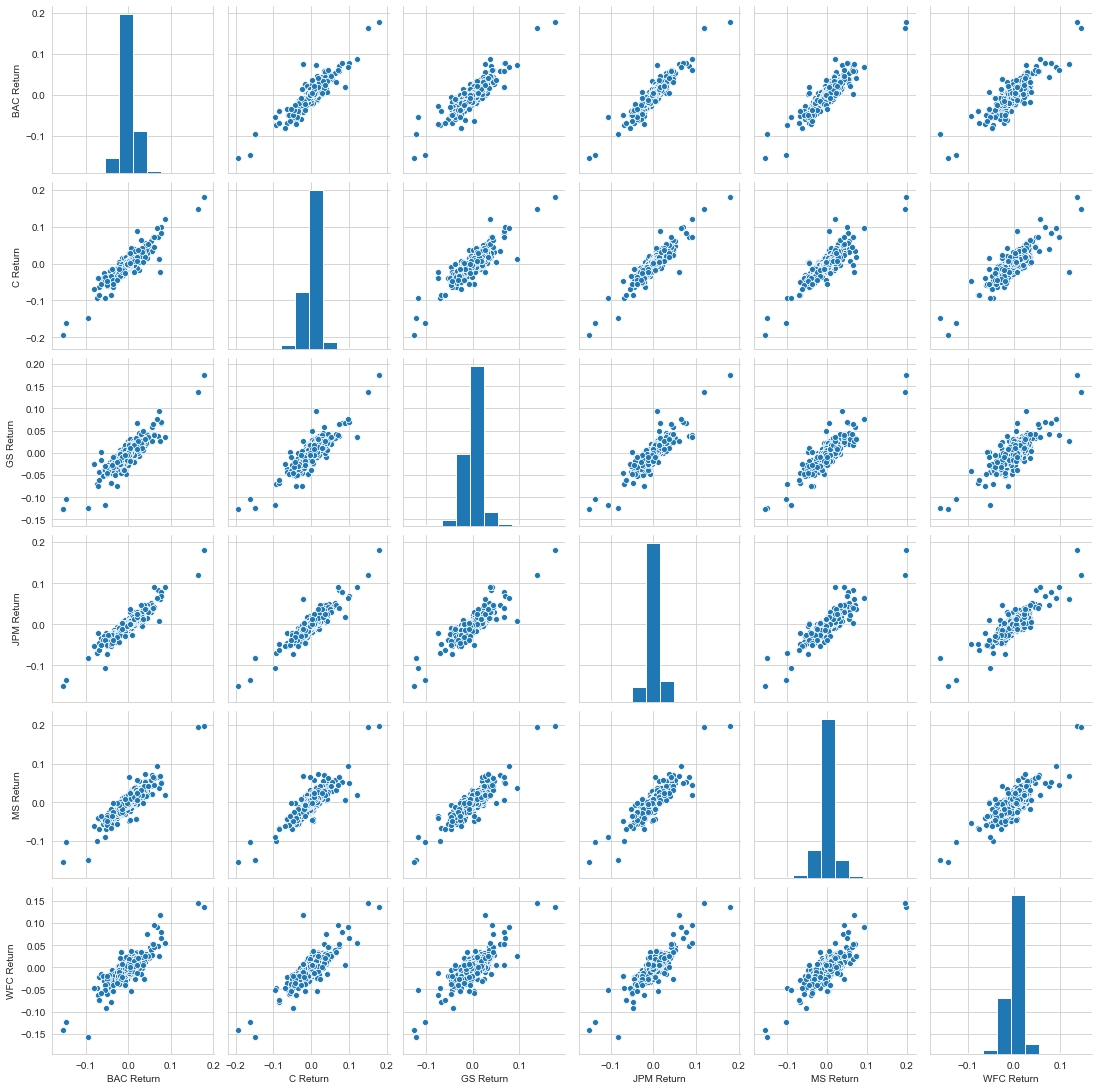

In [268]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [269]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [270]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [271]:
returns.std() # Citigroup riskiest

BAC Return    0.020306
C Return      0.021155
GS Return     0.018734
JPM Return    0.017716
MS Return     0.020906
WFC Return    0.018184
dtype: float64

In [272]:
returns.sort_index(inplace=True)

In [273]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2015-04-21,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-22,0.015488,0.011863,0.007525,0.010089,0.012219,0.007210
2015-04-23,-0.003258,0.002292,0.004907,-0.002201,0.004847,0.003451
2015-04-24,-0.003199,-0.006063,-0.006673,-0.003173,-0.000539,-0.002905
2015-04-27,-0.005093,-0.001869,-0.007209,-0.004152,-0.008213,0.004905
...,...,...,...,...,...,...
2020-04-13,-0.037812,-0.015398,-0.027570,-0.044473,-0.036514,-0.053313
2020-04-14,-0.007943,-0.026992,-0.005302,-0.027396,0.007074,-0.039771
2020-04-15,-0.064897,-0.056363,0.001627,-0.049319,-0.036628,-0.057654


In [274]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016274
C Return      0.015572
GS Return     0.014254
JPM Return    0.013919
MS Return     0.016830
WFC Return    0.012909
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

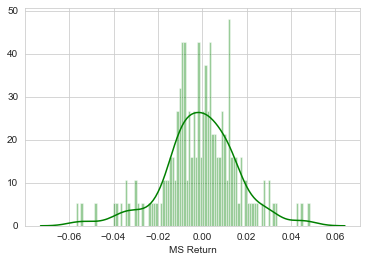

In [275]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

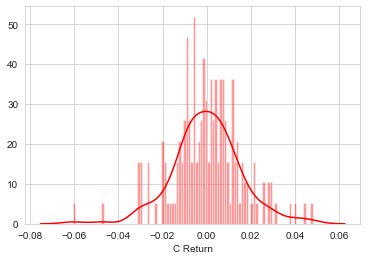

In [276]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

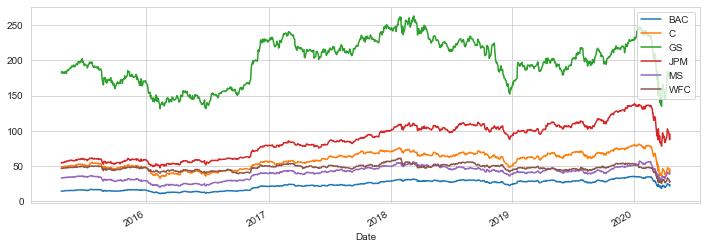

In [278]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

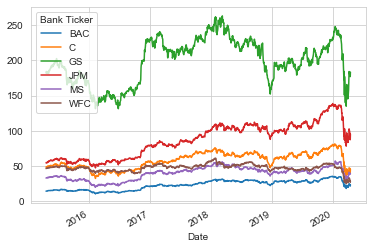

In [279]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [280]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [281]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-21,14.294,14.332,14.141,14.205,69856417
2015-04-22,14.250,14.506,14.195,14.425,79755243
2015-04-23,14.407,14.478,14.370,14.378,54880093
2015-04-24,14.397,14.435,14.303,14.332,44485079
2015-04-27,14.322,14.443,14.259,14.259,80230598
...,...,...,...,...,...
2020-04-13,24.780,24.850,23.780,23.920,83164717
2020-04-14,24.500,24.650,23.100,23.730,88991066
2020-04-15,22.160,22.650,21.910,22.190,99082222


In [282]:
BAC.sort_index(inplace=True)

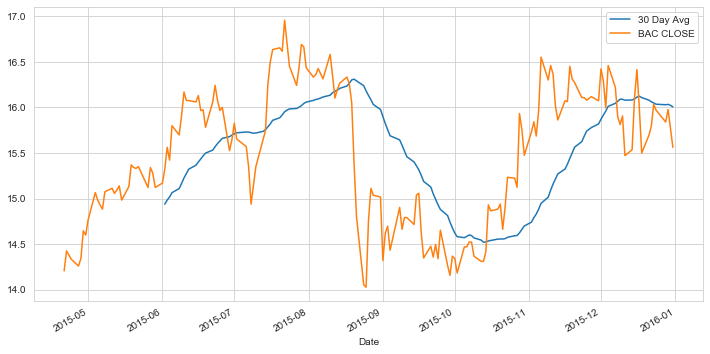

In [283]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2015-01-01':'2016-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2015-01-01':'2016-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

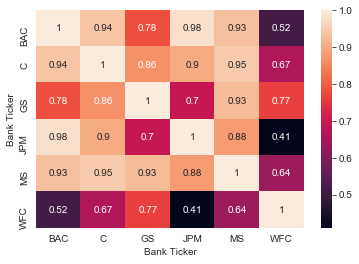

In [284]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

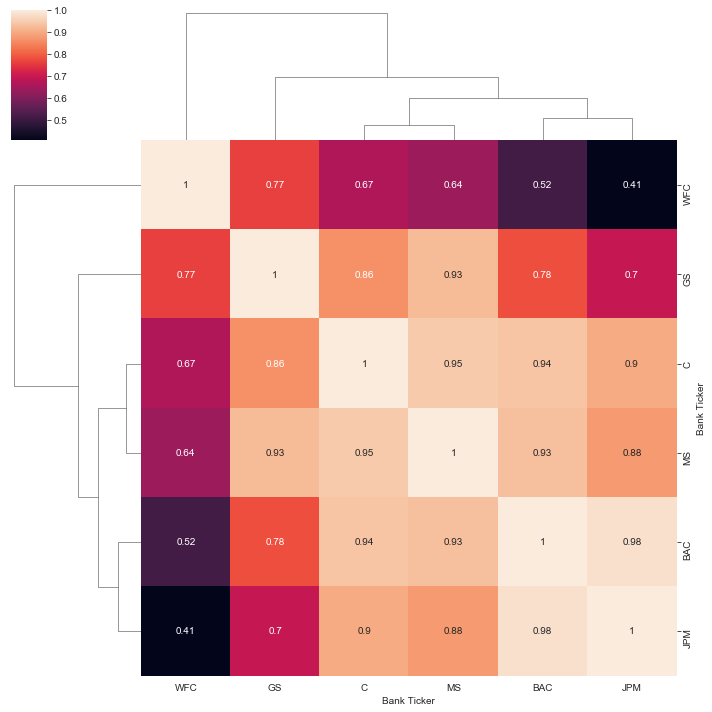

In [285]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [286]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [293]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2019-06-01':'2020-06-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [288]:
MS.sort_index(inplace=True)

In [294]:
MS['Close'].loc['2019-01-01':'2020-06-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [292]:
BAC['Close'].loc['2019-01-01':'2020-05-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.